In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [6]:
df["Gender"].fillna("unavailable",inplace=True)

In [7]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  50553 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [34]:
df["Claim"].value_counts().head()

0    49812
1      741
Name: Claim, dtype: int64

In [35]:
df["Claim"]=df["Claim"].astype(object)

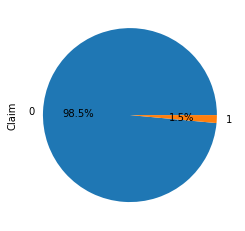

In [36]:
df["Claim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [38]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [39]:
df_num.head()

,Duration,Net Sales,Commision (in value),Age
0,7,0.0,17.82,31
1,85,69.0,0.00,36
2,11,19.8,11.88,75
3,16,20.0,0.00,32
4,10,15.0,0.00,29


In [40]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,MALAYSIA,unavailable
1,EPX,Travel Agency,Online,Cancellation Plan,0,SINGAPORE,unavailable
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,MALAYSIA,unavailable
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,INDONESIA,unavailable
4,EPX,Travel Agency,Online,Cancellation Plan,0,"KOREA, REPUBLIC OF",unavailable


In [41]:
import warnings
warnings.filterwarnings('ignore')

-----------------------------------
Agency


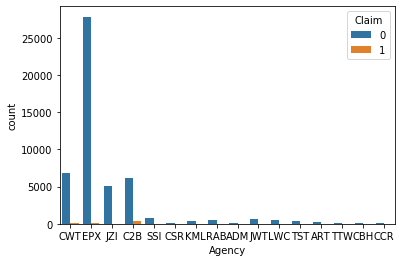

-----------------------------------
Agency Type


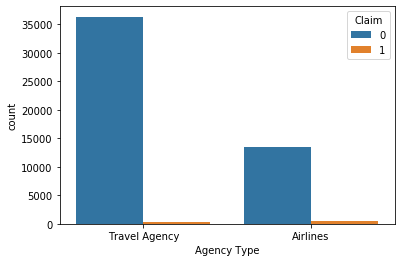

-----------------------------------
Distribution Channel


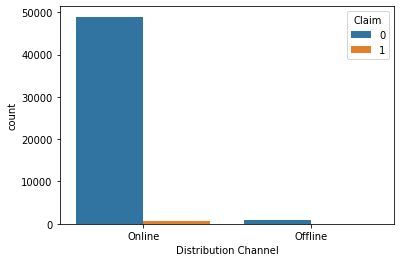

-----------------------------------
Product Name


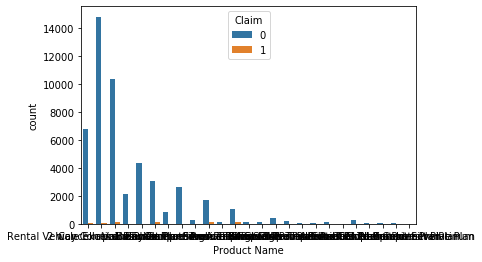

-----------------------------------
Claim


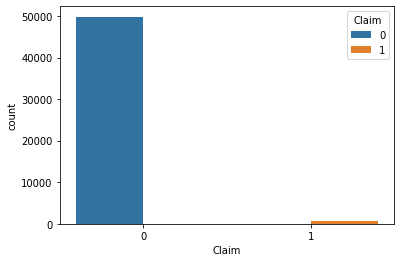

-----------------------------------
Destination


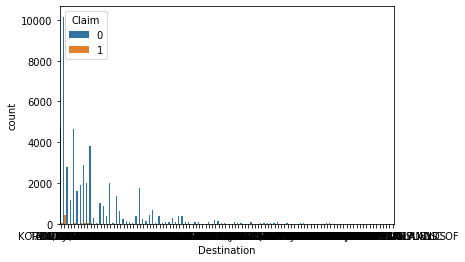

-----------------------------------
Gender


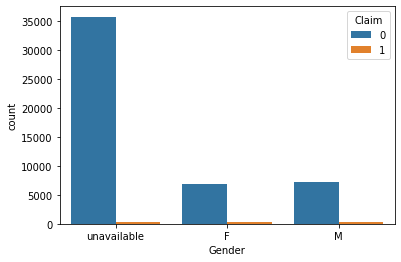

In [42]:
for col in df_cat:
    print("-----------------------------------")
    print(col)
    plt.figure()
    sns.countplot(data=df_cat,x=col,hue="Claim")
    plt.show()

In [ ]:
#label Encoding
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [44]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [45]:
df_new.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender,Duration,Net Sales,Commision (in value),Age
0,6,1,1,16,0,56,2,7,0.0,17.82,31
1,7,1,1,10,0,79,2,85,69.0,0.00,36
2,6,1,1,16,0,56,2,11,19.8,11.88,75
3,7,1,1,1,0,38,2,16,20.0,0.00,32
4,7,1,1,10,0,47,2,10,15.0,0.00,29


In [48]:
from scipy.stats import skew

-----------------------
Duration
22.872063891229274


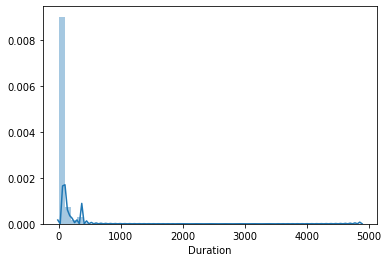

-----------------------
Net Sales
3.3281441910342053


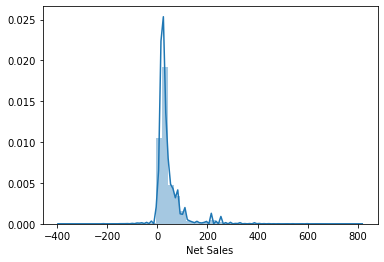

-----------------------
Commision (in value)
4.0780684356634636


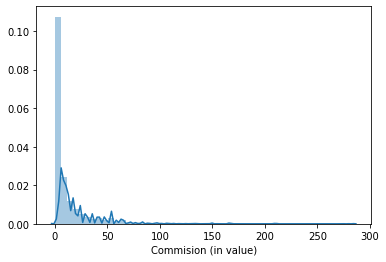

-----------------------
Age
2.9783898494112435


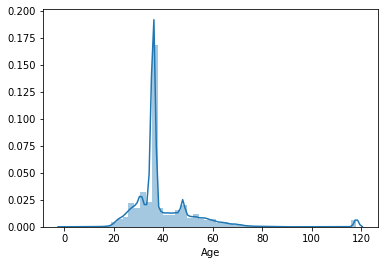

In [49]:
for col in df_num:
    print("-----------------------")
    print(col)
    print(skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [51]:
y=df_new["Claim"]
X=df_new.drop("Claim",axis=1)

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
def create_model(model,X_train,X_test): #generic func
 model.fit(X_train,y_train)
 y_pred=model.predict(X_test)
 print(classification_report(y_test,y_pred))
 return model

In [54]:
lr = LogisticRegression()
create_model(lr,X_train,X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



LogisticRegression()

In [55]:
from imblearn.under_sampling import RandomUnderSampler


In [56]:
rus = RandomUnderSampler(random_state=1)


In [57]:
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)


In [58]:
pd.Series(y_sample1).value_counts()


1    536
0    536
Name: Claim, dtype: int64

In [69]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_sample1,y_sample1)


DecisionTreeClassifier(max_depth=4)

In [70]:
y_pred2 = lr2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14961
           1       0.05      0.62      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.72      0.50     15166
weighted avg       0.98      0.83      0.89     15166



In [61]:
#over sampling

In [62]:
from imblearn.over_sampling import RandomOverSampler


In [63]:
ros = RandomOverSampler(random_state=1)


In [64]:
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)


In [65]:
pd.Series(y_sample2).value_counts()


1    34851
0    34851
Name: Claim, dtype: int64

In [71]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_sample2,y_sample2)


DecisionTreeClassifier(max_depth=4)

In [72]:
y_pred3= lr3.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14961
           1       0.05      0.62      0.09       205

    accuracy                           0.84     15166
   macro avg       0.52      0.73      0.50     15166
weighted avg       0.98      0.84      0.90     15166

